# Exercise 2: Data Processing and Analysis

In [24]:
import pandas as pd #table functions
import matplotlib.pyplot as plt #data visualizations
import seaborn as sns 
import numpy as np #arrays

try:
    import otter
    grader = otter.Notebook() #setting up a grader for our notebook

except:

    !pip install otter-grader
    import otter
    grader = otter.Notebook()
"""
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check"
"""

'\ntry:\n    from gofer.ok import check\nexcept:\n    %pip install git+https://github.com/grading/gradememaybe.git\n    from gofer.ok import check"\n'

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [25]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [26]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [27]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [28]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [29]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows)) #outliers or null heart rates

450


In [30]:
print(outlierHeartRaterows)
print(nullHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [31]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)] #everywhere where things are not null or above 200
# ~ is the opposite

print(len(heartrateRows))

9550


**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [32]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [33]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


len(outlierHeartRaterows) + len(nullHeartRaterows)

/tmp/ipykernel_83996/2944539732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_83996/2944539732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


450

In [34]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())
#it keeps the original mean
print(fullTableHRMean)

75.13268404820141


In [35]:
grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

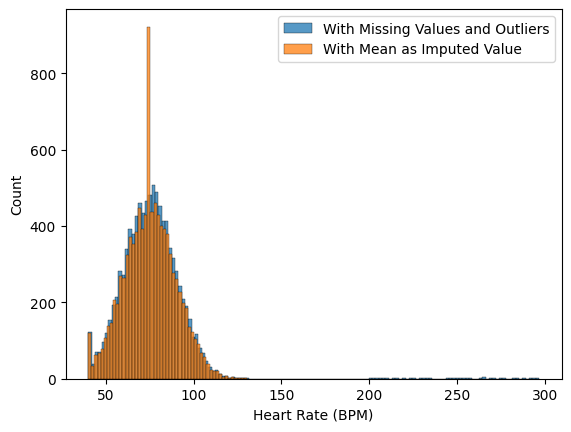

In [36]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: The median value is slightly changed by the imputation value and it is slightly lower than the original median. Adding the mean value makes the imputated mean slightly lower.

...

In [37]:
## coding cell to check the difference in median values 

imputationHRMedian = smartwatch_hr['Heart Rate (BPM)'].median()
originalHRMedian = smartwatch['Heart Rate (BPM)'].median()

print(imputationHRMedian, originalHRMedian)

75.13268404820141 75.22060125775644


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [38]:
minBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].min())

maxBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].max())

meanBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].mean())

minBloodO2, maxBloodO2, meanBloodO2

(90.79120814564097, 100.0, 97.84158102099076)

In [39]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

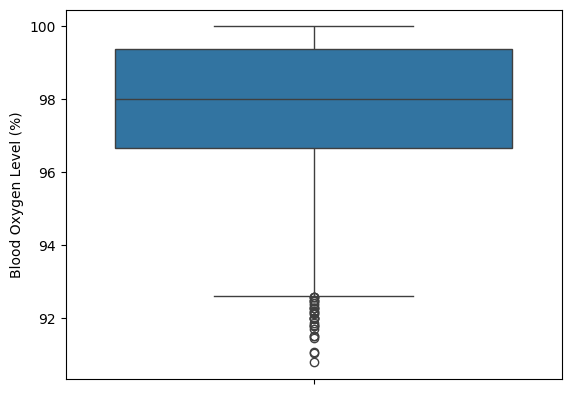

In [40]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: I decided to impute the null and outlier values again because there were multiple below the minimum and I thought it would be important to still include them. This made the BO levels that were below the minimum to also be usable data. 

....

In [41]:
## use this space or additional cells to deal with the missing/outlier values. 

outlierBOTable = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] <= minBloodO2]
nullBOTable = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]

print(len(outlierBOTable))
print(len(nullBOTable))

BORows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch_hr['Blood Oxygen Level (%)'] >=  minBloodO2)]

outlierBOTable['Blood Oxygen Level (%)'] = meanBloodO2
nullBOTable['Blood Oxygen Level (%)'] = meanBloodO2

smartwatch_o2 = pd.concat([outlierBOTable, nullBOTable, BORows])

smartwatch_o2

1
300


/tmp/ipykernel_83996/2589469284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierBOTable['Blood Oxygen Level (%)'] = meanBloodO2
/tmp/ipykernel_83996/2589469284.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullBOTable['Blood Oxygen Level (%)'] = meanBloodO2


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
9577,2341.0,61.844491,97.841581,9594.119586,5.9351943459604035,Active,3
818,3156.0,75.132684,97.841581,7281.778831,4.300171191258864,Sedentary,3
8369,2283.0,75.132684,97.841581,21495.639335,5.291653956497481,Highly_Active,2
1615,1417.0,75.132684,97.841581,1585.892722,5.850088362685106,Seddentary,9
1712,4079.0,75.132684,97.841581,19003.921284,5.612504092265231,Active,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [42]:
minSteps = float(smartwatch['Step Count'].min())

maxSteps = float(smartwatch['Step Count'].max())

meanSteps = float(smartwatch['Step Count'].mean())

minSteps, maxSteps, meanSteps

(0.9101380609604088, 62486.690753464914, 6985.685884992229)

In [43]:
grader.check('q6')

Question 6 results: All test cases passed!

<Axes: ylabel='Step Count'>

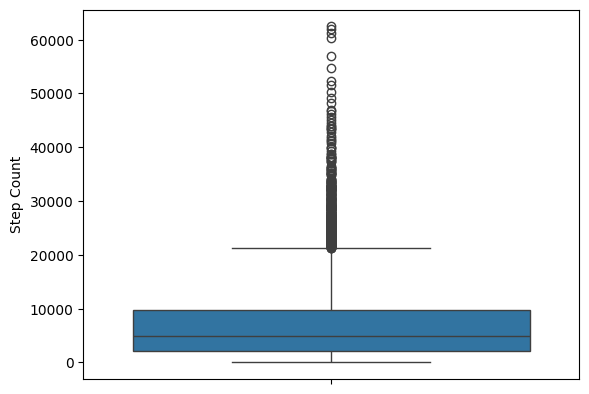

In [44]:
sns.boxplot(smartwatch['Step Count'])

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: As there were not too many null values, I chose to exclude them as I didnt think they would make a significant contribution to the data. I kept the single outlier and made it the mean, so the data is not skewed.

....

In [45]:
## use this space or additional cells to address the missing or outlier data. 

outlierStepTable = smartwatch_o2[smartwatch_o2['Step Count'] > 21000]
nullStepTable = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]

print(len(outlierStepTable))
print(len(nullStepTable))

StepRows = smartwatch_o2[(~smartwatch_o2['Step Count'].isnull()) & (smartwatch_o2['Step Count'] <= 21000)]

outlierStepTable ['Step Count'] = meanSteps

smartwatch_steps = pd.concat([outlierStepTable, StepRows])

smartwatch_steps

459
100


/tmp/ipykernel_83996/3093030014.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierStepTable ['Step Count'] = meanSteps


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8369,2283.0,75.132684,97.841581,6985.685885,5.291653956497481,Highly_Active,2
644,3744.0,52.578793,97.841581,6985.685885,4.497472763173107,Sedentary,7
1260,3072.0,95.873161,97.841581,6985.685885,6.175934332407844,Sedentary,2
1779,2555.0,46.441672,97.841581,6985.685885,7.969197935150531,Active,8
1850,1730.0,93.219529,97.841581,6985.685885,5.442775017379499,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [47]:
minSleep = float(smartwatch['Sleep Duration (hours)'].min())

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [48]:
for item in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(item)  ## first try to see if it can be converted to a number
    except:
        print(item)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [49]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,6985.685885,ERROR,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,ERROR,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,ERROR,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,ERROR,Sedentary,3
7216,1498.0,112.891244,97.376654,6985.685885,ERROR,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,ERROR,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [50]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_83996/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,6985.685885,NaN,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,NaN,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,NaN,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,NaN,Sedentary,3
7216,1498.0,112.891244,97.376654,6985.685885,NaN,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,NaN,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [51]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8369,2283.0,75.132684,97.841581,6985.685885,5.291654,Highly_Active,2
644,3744.0,52.578793,97.841581,6985.685885,4.497473,Sedentary,7
1260,3072.0,95.873161,97.841581,6985.685885,6.175934,Sedentary,2
1779,2555.0,46.441672,97.841581,6985.685885,7.969198,Active,8
1850,1730.0,93.219529,97.841581,6985.685885,5.442775,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [52]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()
maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()
meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.508128656403265))

In [53]:
grader.check('q8')

Question 8 results:
    Question 8 - 1 result:
        ❌ Test case failed
        Trying:
            bool((minSleep == -0.1944527906201543) or (minSleep == np.float64(-0.1944527906201543)))
        Expecting:
            True
        ok
        Trying:
            bool((maxSleep == 12.140232872862926) or (maxSleep == np.float64(12.140232872862926)))
        Expecting:
            True
        ok
        Trying:
            bool((meanSleep ==  6.505462918406444) or (meanSleep == np.float64(6.505462918406444)))
        Expecting:
            True
        **********************************************************************
        Line 7, in Question 8 0
        Failed example:
            bool((meanSleep ==  6.505462918406444) or (meanSleep == np.float64(6.505462918406444)))
        Expected:
            True
        Got:
            False

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: I chose to make the outliers and null values the mean through imputation because there were multiple values and I did not want to exclude the data entirely. The outliers were above and below the minimum and maximum so I pulled them out through that manner. 

....

<Axes: ylabel='Sleep Duration (hours)'>

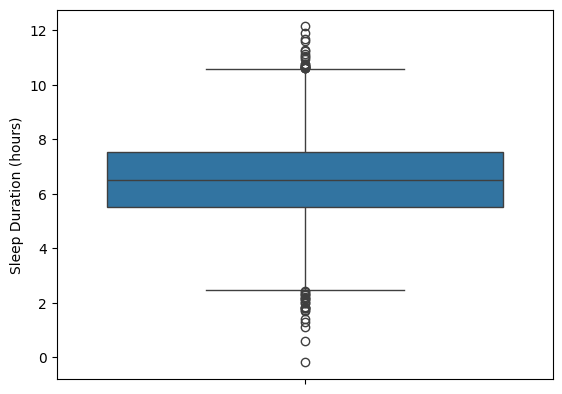

In [54]:
sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])

In [55]:
## use this space or additional cells to address the missing or outlier data. 

outlierSleepTable = pd.concat([smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] > 11],smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] < 2]])
nullSleepTable = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]


SleepRows = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_sleep['Sleep Duration (hours)'] >= 2) & (smartwatch_sleep['Sleep Duration (hours)'] <= 11)]

outlierSleepTable ['Sleep Duration (hours)'] = meanSleep
nullSleepTable ['Sleep Duration (hours)'] = meanSleep

smartwatch_updated_sleep = pd.concat([outlierSleepTable, nullSleepTable, SleepRows])

smartwatch_updated_sleep

/tmp/ipykernel_83996/1890373189.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleepTable ['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
295,3432.0,68.374374,99.941652,877.602554,6.508129,Actve,7
459,1658.0,65.173266,97.361383,960.362774,6.508129,Active,3
3477,1788.0,91.014161,97.510911,10112.951696,6.508129,Seddentary,6
5559,1273.0,75.105388,98.688556,4948.706571,6.508129,Active,4
5812,2907.0,60.751130,99.876732,590.948288,6.508129,Actve,6
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [56]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        print(item)
        int(item)
    except:
        print(item)

7
3
6
4
10
1
9
2
8
5
Very High
Very High
nan
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
To deal with the very high value, I decided to replace them with none, which puts a null value in its place.

In [57]:
## cell to deal with 'Very High' valuesmartwatch_updated_sleep['Stress Level'] = smartwatch_updated_sleep['Stress Level'].replace('Very High', None)
smartwatch_updated_sleep['Stress Level'] = pd.to_numeric(smartwatch_updated_sleep['Stress Level'], errors='coerce')

smartwatch_stress = smartwatch_updated_sleep

smartwatch_stress


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
295,3432.0,68.374374,99.941652,877.602554,6.508129,Actve,7.0
459,1658.0,65.173266,97.361383,960.362774,6.508129,Active,3.0
3477,1788.0,91.014161,97.510911,10112.951696,6.508129,Seddentary,6.0
5559,1273.0,75.105388,98.688556,4948.706571,6.508129,Active,4.0
5812,2907.0,60.751130,99.876732,590.948288,6.508129,Actve,6.0
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10.0
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7.0
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2.0
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4.0


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [58]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [59]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] =  'Highly Active' ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Actve')]  ## Pull out rows for two unique values matching active
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'Seddentary')]  ## Pull out rows for two unique values matching active
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_83996/3052326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] =  'Highly Active' ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_83996/3052326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_83996/3052326261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
6668,4770.0,84.631370,96.004170,9000.775767,6.508129,Highly Active,4.0,1.0
252,1709.0,77.099211,97.841581,3465.970911,6.508129,Highly Active,9.0,1.0
3264,4078.0,79.568061,99.268270,4000.982032,6.508129,Highly Active,2.0,1.0
4022,1343.0,86.880968,99.925376,5928.993113,6.508129,Highly Active,7.0,1.0
5818,2293.0,80.840205,98.691372,5033.180668,6.508129,Highly Active,9.0,1.0
...,...,...,...,...,...,...,...,...
9842,2108.0,71.152455,98.585987,1480.777008,8.379498,NaN,9.0,NaN
9845,4203.0,91.417098,95.383875,1238.788704,6.226965,NaN,7.0,NaN
9867,2674.0,69.075313,99.067026,2759.328767,4.919706,NaN,5.0,NaN
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8.0,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [60]:
final_table.isnull().sum()

User ID                   199
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            199
Stress Level              248
NumActivity               199
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [61]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9901 entries, 6668 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9702 non-null   float64
 1   Heart Rate (BPM)        9901 non-null   float64
 2   Blood Oxygen Level (%)  9901 non-null   float64
 3   Step Count              9901 non-null   float64
 4   Sleep Duration (hours)  9901 non-null   float64
 5   Activity Level          9702 non-null   object 
 6   Stress Level            9653 non-null   float64
 7   NumActivity             9702 non-null   float64
dtypes: float64(7), object(1)
memory usage: 696.2+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER: The scatterplot is evenly spread across the x and y axis. It is not concentrated around one point, the points are spread throughout. 

...

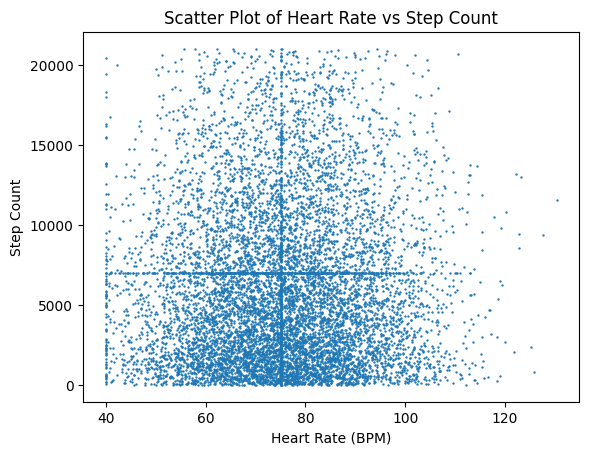

In [62]:
x = final_table['Heart Rate (BPM)']
y = final_table['Step Count']

#plt.scatter(x, y, s=1)
plt.scatter(x, y, s=0.5)
plt.ylabel('Step Count')
plt.xlabel('Heart Rate (BPM)')
plt.title('Scatter Plot of Heart Rate vs Step Count')
plt.show()

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: The scatterplot with the nans is more concentrated than the scatterplot where the nan is not imputed or removed, and the distribution is more scattered without the nans in their original place. 
...

In [63]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

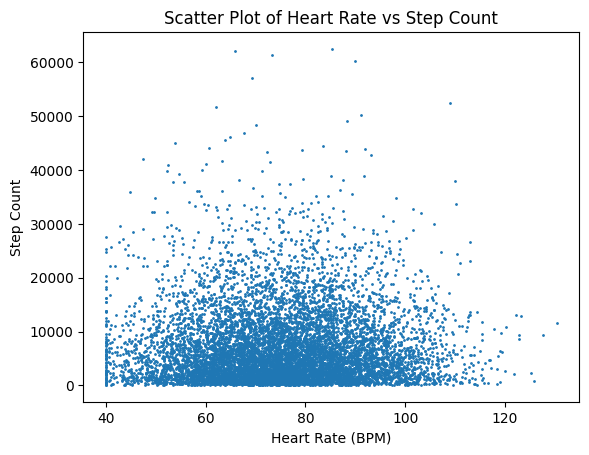

In [64]:
x = nanTable['Heart Rate (BPM)']
y = nanTable['Step Count']

plt.scatter(x, y, s = 1)
plt.ylabel('Step Count')
plt.xlabel('Heart Rate (BPM)')
plt.title('Scatter Plot of Heart Rate vs Step Count')
plt.show()

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

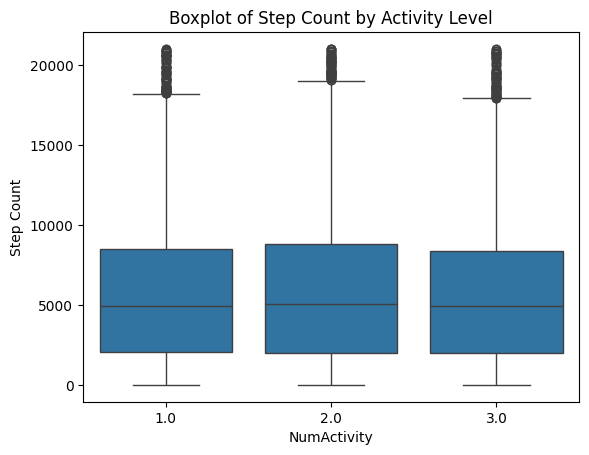

In [ ]:
## Visualization 
# print(final_table['NumActivity'].duplicated().sum())
final_table = final_table.reset_index(drop=True) #I used code from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
sns.boxplot(x='NumActivity', y='Step Count', data=final_table)
plt.title('Boxplot of Step Count by Activity Level') 
plt.show()

In [74]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['NumActivity'] == 1]  ## sedentary rows
act = final_table[final_table['NumActivity'] == 2]  ## active rows
hact = final_table[final_table['NumActivity'] == 1]  ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.659, p-value: 0.517


Is there significant difference between the groups' step counts?  

ANSWER: There is no statistically significant difference between the groups' step counts as the p value is greater than 0.05. 

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER: It is important that the findings of this dataset communicates how health-related data can have a greater impact on how public health policies are implemented. We should avoid removing outliers or nan values entirely as we should consider the implications of such data to our dataset. We should take into account how thhis data may be or may nay not be statistically significant and it is important to consider how we may innacurately represent data that is not statistically significant. We should also avoid using our personal biases or overtly categorizing the data, when its peoples actual lived experiences. 

....